# Import required libraries

In [23]:
from maracas.dataset import Dataset
from google.colab import files
import numpy as np
import glob
import os
from tqdm import tqdm
# plt, plot, tqdm
import warnings
warnings.filterwarnings('ignore')
from scipy.io import wavfile
import scipy.signal as sps
import math
import os
import shutil
import random
# Packages we're using
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile
from pydub import AudioSegment
from scipy.signal import butter, lfilter
import scipy.ndimage
from tqdm import tqdm
import numpy as np
import math
from PIL import Image
import time
import IPython.display as ipd
import wave

In [1]:
!pip install scipy --upgrade
!pip install pydub
!pip install maracas

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Obtain speech and noise files

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
########################################################## clean speech files
!kaggle datasets download -d tommyngx/fluent-speech-corpus

100% 1.44G/1.44G [00:22<00:00, 89.3MB/s]
100% 1.44G/1.44G [00:22<00:00, 68.1MB/s]


In [4]:
######################################################### noise files
!kaggle competitions download -c freesound-audio-tagging

100% 7.04G/7.05G [01:55<00:00, 76.5MB/s]
100% 7.05G/7.05G [01:55<00:00, 65.3MB/s]


## Make noise and speech directories


In [ ]:
shutil.rmtree('/content/speechPathA')
shutil.rmtree('/content/speechPathB')
shutil.rmtree('/content/noisesA')
shutil.rmtree('/content/noisesB')
shutil.rmtree('/content/BWAVNOISE')
shutil.rmtree('/content/BWAVN')
shutil.rmtree('/content/WAVA')
shutil.rmtree('/content/WAVB')
shutil.rmtree('/content/Clean_arr')
shutil.rmtree('/content/Noisy_arr')

In [ ]:
os.mkdir('/content/speechPathA')
os.mkdir('/content/speechPathB')
os.mkdir('/content/noisesA')
os.mkdir('/content/noisesB')
os.mkdir('/content/BWAVNOISE')
os.mkdir('/content/BWAVN')
os.mkdir('/content/WAVA')
os.mkdir('/content/WAVB')
os.mkdir('/content/Clean_arr')
os.mkdir('/content/Noisy_arr')

### Speech files

In [ ]:
############################################# unzip speech files to directory
!unzip /content/fluent-speech-corpus.zip -d /content/speechPathA

In [ ]:
############################################# unzip speech files to directory
!unzip /content/fluent-speech-corpus.zip -d /content/speechPathB

In [ ]:
############################################## Copy files in speech folders into single folder
speakers = '/content/speechPathA/fluent_speech_commands_dataset/wavs/speakers'
dst_dir = "/content/speechPathA"
for sp in os.listdir(speakers):
  for f in os.listdir(os.path.join(speakers, sp)):
    shutil.copy(os.path.join(speakers, sp,f), dst_dir)

In [ ]:
############################################## Copy files in speech folders into single folder
speakers = '/content/speechPathB/fluent_speech_commands_dataset/wavs/speakers'
dst_dir = "/content/speechPathB"
for sp in os.listdir(speakers):
  for f in os.listdir(os.path.join(speakers, sp)):
    shutil.copy(os.path.join(speakers, sp,f), dst_dir)

In [ ]:
############################################## Remove unecessaty folders
shutil.rmtree('/content/speechPathA/fluent_speech_commands_dataset')
shutil.rmtree('/content/speechPathB/fluent_speech_commands_dataset')

### Noises files

In [ ]:
############################################# unzip noises files to directory
!unzip /content/freesound-audio-tagging.zip -d /content/noisesA

In [ ]:
############################################# unzip noises files to directory
!unzip /content/freesound-audio-tagging.zip -d /content/noisesB

In [ ]:
################################################## Remove unecessary files
!rm /content/noisesA/sample_submission.csv
!rm /content/noisesA/test_post_competition.csv
!rm /content/noisesA/train.csv
!rm /content/noisesA/train_post_competition.csv

!rm /content/noisesB/sample_submission.csv
!rm /content/noisesB/test_post_competition.csv
!rm /content/noisesB/train.csv
!rm /content/noisesB/train_post_competition.csv

In [ ]:
#################################### copy noises into single folder
noises_path = '/content/noisesA'
dst_dir = "/content/noisesA"
for noise in os.listdir(noises_path):
  for f in os.listdir(os.path.join(noises_path, noise)):
    shutil.copy(os.path.join(noises_path, noise,f), dst_dir)

In [ ]:
#################################### copy noises into single folder
noises_path = '/content/noisesB'
dst_dir = "/content/noisesB"
for noise in os.listdir(noises_path):
  for f in os.listdir(os.path.join(noises_path, noise)):
    shutil.copy(os.path.join(noises_path, noise,f), dst_dir)

In [ ]:
########################################### Remove unecessary folders
shutil.rmtree('/content/noisesA/audio_test')
shutil.rmtree('/content/noisesA/audio_train')

shutil.rmtree('/content/noisesB/audio_test')
shutil.rmtree('/content/noisesB/audio_train')

In [ ]:
######################################## Remove corrupted files
!rm /content/noisesA/0b0427e2.wav
!rm /content/noisesB/0b0427e2.wav
!rm /content/noisesA/6ea0099f.wav
!rm /content/noisesB/6ea0099f.wav
!rm /content/noisesA/b39975f5.wav
!rm /content/noisesB/b39975f5.wav

### Define paths

In [ ]:
################################################### Define paths
speechPathA = '/content/speechPathA'
speechPathB = '/content/speechPathB'
NoisesA = '/content/noisesA'
NoisesB = '/content/noisesB'
NoiseSpeechWavB = '/content/BWAVNOISE'

### Check data shape of sample noise and speech file & number of noise and speech files

In [ ]:
####################################### Speech file
sampling_rate, data = wavfile.read('/content/speechPathA/0001d0c0-4614-11e9-bc65-55b32b211b66.wav')
data.shape

16000

In [ ]:
###################################### Noise file
sampling_rate, data = wavfile.read('/content/noisesA/00044347.wav')
data.shape

(617400,)

In [ ]:
################################################# Number of noise and speech files
img_list = os.listdir(os.path.join(speechPathA))
num_wavs = len(img_list)
print(num_wavs)

img_list = os.listdir(os.path.join(NoisesA))
num_wavs = len(img_list)
print(num_wavs)

30043
18870


### Down Sample the sampling rate to 16K

In [ ]:
A = os.path.join(speechPathA)
B = os.path.join(speechPathB)

img_list = os.listdir(A)
num_wavs = len(img_list)
#print(num_wavs)
new_rate = 16000

for n in range(num_wavs):
    name_A = img_list[n]
    name_B = name_A
    path_A = os.path.join(A,name_A)
    path_B = os.path.join(B,name_B)
  #  print(path_A, path_B)
    if os.path.isfile(path_A) and os.path.isfile(path_B):
        sampling_rate, data = wavfile.read(path_A)
#         print(sampling_rate)
         # Resample data
        number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
        data = sps.resample(data, number_of_samples)
        data = np.asarray(data, dtype=np.int16)
        wavfile.write(path_B,new_rate,data)
        sampling_rate, data = wavfile.read(path_B)
     #   print(sampling_rate)
    else:
        print("error")



### Resample noises to 16K

In [ ]:
A = os.path.join(NoisesA)
B = os.path.join(NoisesB)

img_list = os.listdir(A)
num_wavs = len(img_list)
new_rate = 16000

for n in range(num_wavs):
    name_A = img_list[n]
    name_B = name_A
    path_A = os.path.join(A,name_A)
    path_B = os.path.join(B,name_B)

    if os.path.isfile(path_A) and os.path.isfile(path_B):
        sampling_rate, data = wavfile.read(path_A)
        # print(name_A)
         # Resample data
        number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
        data = sps.resample(data, number_of_samples)
        data = np.asarray(data, dtype=np.int16)
        wavfile.write(path_B,new_rate,data)
        sampling_rate, data = wavfile.read(path_B)
        #print(sampling_rate)
    else:
        print("error")

### Make all noise files longer than speech file

In [ ]:
A = os.path.join(NoisesA)
B = os.path.join(NoisesB)

img_list = os.listdir(A)
num_wavs = len(img_list)
new_rate = 16000

for n in range(num_wavs):
    name_A = img_list[n]
    name_B = name_A
    path_A = os.path.join(A,name_A)
    path_B = os.path.join(B,name_B)

    if os.path.isfile(path_A) and os.path.isfile(path_B):
        sampling_rate, data = wavfile.read(path_A)
        length_s = len(data)/float(sampling_rate)
        if(length_s < 50.0):
            n = math.ceil(50*sampling_rate/len(data))
        data = np.tile(data,n)
        
        number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
        data = sps.resample(data, number_of_samples)
        data = np.asarray(data, dtype=np.int16)
        wavfile.write(path_B,new_rate,data)

### Add Speech ( 16 K Sampled ) to dataset

In [ ]:
np.random.seed(42)

d = Dataset()

d.add_speech_files(speechPathB, recursive=True)

### Add Noise with sampling rate = 16K & length greater than the speech to dataset

In [ ]:
d.add_noise_files(NoisesB)

### Combining noises with speech

In [ ]:
######################################### creating noisy speech data
for i in range(1): 
    d.generate_dataset([-6, -3, 0, 3, 6], NoiseSpeechWavB, files_per_condition = 1)

In [ ]:
DEST =  '/content/BWAVN'
DESTPATH = os.path.join(DEST)

for root, dirs, files in os.walk("/content/BWAVNOISE"):
    for file in files:
        if file.endswith(".wav"):
            print(file)
            shutil.copy(os.path.join(root, file), DEST)

In [ ]:
# Copy noisy wav files from BWAVN to WAVB

source = '/content/BWAVN'
destination = '/content/WAVB'

for filename in glob.glob(os.path.join(source, '*.wav')):
    shutil.copy(filename, destination)

In [ ]:
# BWAV - find files which are present in WAVB(BWAVN)
# WAVA, WAVB

pathWavA = '/content/WAVA'
pathWavB = '/content/WAVB'
pathWavC =  '/content/speechPathB' # Original speech file sampled at 16K


A = os.path.join(pathWavA)
B = os.path.join(pathWavB)
C = os.path.join(pathWavC)


wav_list_C = os.listdir(C)
num_wavs_C = len(wav_list_C)

wav_list_B = os.listdir(B)
num_wavs_B = len(wav_list_B)

for m in range(num_wavs_C):
    name_C = wav_list_C[m]
    path_C = os.path.join(C,name_C)
    if name_C.endswith(".wav"):
        for n in range(num_wavs_B):
            name_B = wav_list_B[n]
            if name_B.endswith(".wav"):
                if name_C == name_B :
                    shutil.copy(path_C, pathWavA)
                    break

### Cut size of audio to 1 second

In [ ]:
t1 = 0  #Works in milliseconds
t2 = 1000

for root, dirs, files in os.walk("/content/WAVA"):
  for file in files:
    newAudio = AudioSegment.from_wav(os.path.join('/content/WAVA', file))
    newAudio = newAudio[t1:t2]
    newAudio.export(os.path.join('/content/WAVA', file), format="wav") 

for root, dirs, files in os.walk("/content/WAVB"):
  for file in files:
    newAudio = AudioSegment.from_wav(os.path.join('/content/WAVB', file))
    newAudio = newAudio[t1:t2]
    newAudio.export(os.path.join('/content/WAVB', file), format="wav") 

In [ ]:
############################################### Copy wav files to file
from google.colab import files
!zip -r /content/WAVA.zip /content/WAVA # clean speech wav files
!zip -r /content/WAVB.zip /content/WAVB # noisy speech wav files

shutil.copy("/content/WAVA.zip","/content/drive/MyDrive")
shutil.copy("/content/WAVB.zip","/content/drive/MyDrive")

### Create arrays from audio

In [ ]:
FFT_LENGTH = 512
WINDOW_LENGTH = 512
WINDOW_STEP = int(WINDOW_LENGTH / 2)
magnitudeMin = float("inf")
magnitudeMax = float("-inf")
phaseMin = float("inf")
phaseMax = float("-inf")

In [ ]:
################################# Define funtctions to convert wav file to arrays
def amplifyMagnitudeByLog(d):
    return 188.301 * math.log10(d + 1)

def weakenAmplifiedMagnitude(d):
    return math.pow(10, d/188.301)-1

def generateLinearScale(magnitudePixels, phasePixels, 
                        magnitudeMin, magnitudeMax, phaseMin, phaseMax):
    height = magnitudePixels.shape[0]
    width = magnitudePixels.shape[1]
    magnitudeRange = magnitudeMax - magnitudeMin
    phaseRange = phaseMax - phaseMin
    rgbArray = np.zeros((height, width, 3), 'uint8')
    
    for w in range(width):
        for h in range(height):
            magnitudePixels[h,w] = (magnitudePixels[h,w] - magnitudeMin) / (magnitudeRange) * 255 * 2
            magnitudePixels[h,w] = amplifyMagnitudeByLog(magnitudePixels[h,w])
            phasePixels[h,w] = (phasePixels[h,w] - phaseMin) / (phaseRange) * 255
            red = 255 if magnitudePixels[h,w] > 255 else magnitudePixels[h,w]
            green = (magnitudePixels[h,w] - 255) if magnitudePixels[h,w] > 255 else 0
            blue = phasePixels[h,w]
            rgbArray[h,w,0] = int(red)
            rgbArray[h,w,1] = int(green)
            rgbArray[h,w,2] = int(blue)
    return rgbArray

def recoverLinearScale(rgbArray, magnitudeMin, magnitudeMax, 
                       phaseMin, phaseMax):
    width = rgbArray.shape[1]
    height = rgbArray.shape[0]
    print(phaseMax,phaseMin)
    magnitudeVals = rgbArray[:,:,0].astype(float) + rgbArray[:,:,1].astype(float)
    phaseVals = rgbArray[:,:,2].astype(float)
    phaseRange = phaseMax - phaseMin
    magnitudeRange = magnitudeMax - magnitudeMin
    
    for w in range(width):
        for h in range(height):
            phaseVals[h,w] = (phaseVals[h,w] / 255 * phaseRange) + phaseMin
            magnitudeVals[h,w] = weakenAmplifiedMagnitude(magnitudeVals[h,w])
            magnitudeVals[h,w] = (magnitudeVals[h,w] / (255*2) * magnitudeRange) + magnitudeMin
    return magnitudeVals, phaseVals

In [ ]:
def generateSpectrogramForWave(signal):
    start_time = time.time()
    global magnitudeMin
    global magnitudeMax
    global phaseMin
    global phaseMax
    buffer = np.zeros(int(signal.size + WINDOW_STEP - (signal.size % WINDOW_STEP)))
    buffer[0:len(signal)] = signal
    height = int(FFT_LENGTH / 2 + 1)
    width = int(len(buffer) / (WINDOW_STEP) - 1)
    magnitudePixels = np.zeros((height, width))
    phasePixels = np.zeros((height, width))

    for w in range(width):
        buff = np.zeros(FFT_LENGTH)
        stepBuff = buffer[w*WINDOW_STEP:w*WINDOW_STEP + WINDOW_LENGTH]
        # apply hanning window
        stepBuff = stepBuff * np.hanning(WINDOW_LENGTH)
        buff[0:len(stepBuff)] = stepBuff
        #buff now contains windowed signal with step length and padded with zeroes to the end
        fft = np.fft.rfft(buff)
        for h in range(len(fft)):
            magnitude = math.sqrt(fft[h].real**2 + fft[h].imag**2)
            if magnitude > magnitudeMax:
                magnitudeMax = magnitude 
            if magnitude < magnitudeMin:
                magnitudeMin = magnitude 

            phase = math.atan2(fft[h].imag, fft[h].real)
            if phase > phaseMax:
                phaseMax = phase
            if phase < phaseMin:
                phaseMin = phase
            magnitudePixels[height-h-1,w] = magnitude
            phasePixels[height-h-1,w] = phase
    rgbArray = generateLinearScale(magnitudePixels, phasePixels,
                                  magnitudeMin, magnitudeMax, phaseMin, phaseMax)
    
    
    elapsed_time = time.time() - start_time
    print('%.2f' % elapsed_time, 's', sep='')
    img = Image.fromarray(rgbArray, 'RGB')
    return img

### Create folder with clean speech arrays




In [ ]:
random.seed(1)
path_clean = '/content/WAVA'

for filename in tqdm(glob.glob(os.path.join(path_clean, '*.wav'))):
    rate, data = wavfile.read(filename)
    if len(data.shape) >= 2 and data.size > 0:
        if data.shape[-1] > 1:
            data = data.mean(axis=-1)
        else:
            data = np.reshape(data, data.shape[:-1])
        
    if np.shape(data)[0] / float(rate) > 1:
        data = data[0 : rate * 1]
            
    img = generateSpectrogramForWave(data)
    np.save(filename[:-4]+'.npy', img) # save

path = '/content/WAVA'
for filename in tqdm(glob.glob(os.path.join(path_clean, '*.npy'))):
   shutil.copy(filename, '/content/Clean_arr')

### Create folder with noisy speech arrays

In [ ]:
random.seed(1)
path_noisy = '/content/WAVB'

for filename in tqdm(glob.glob(os.path.join(path_noisy, '*.wav'))):
    rate, data = wavfile.read(filename)
    if len(data.shape) >= 2 and data.size > 0:
        if data.shape[-1] > 1:
            data = data.mean(axis=-1)
        else:
            data = np.reshape(data, data.shape[:-1])
        
    if np.shape(data)[0] / float(rate) > 1:
        data = data[0 : rate * 1]
            
    img = generateSpectrogramForWave(data)
    np.save(filename[:-4]+'.npy', img) # save

for filename in tqdm(glob.glob(os.path.join(path_noisy, '*.npy'))):
   shutil.copy(filename, '/content/Noisy_arr')

In [ ]:
################################################### save files to drive
!zip -r /content/Clean_arr.zip /content/Clean_arr
!zip -r /content/Noisy_arr.zip /content/Noisy_arr

shutil.copy("/content/Clean_arr.zip","/content/drive/MyDrive")
shutil.copy("/content/Noisy_arr.zip","/content/drive/MyDrive")

#### Load in Arrays

In [ ]:
############################### unzip clean speech arrays
!unzip /content/drive/MyDrive/Clean_arr.zip -d /content/clean_data

In [ ]:
############################### unzip noisy speech arrays
!unzip /content/drive/MyDrive/Noisy_arr.zip -d /content/noisy_data

In [ ]:
############################### unzip clean speech wav files
!unzip /content/drive/MyDrive/WAVA.zip -d /content/clean_wav

In [ ]:
############################### unzip noisy speech wav files
!unzip /content/drive/MyDrive/WAVB.zip -d /content/noisy_wav

In [ ]:
################################################# Number of noisy speech and clean speech arrays
img_list = os.listdir('/content/noisy_data/content/Noisy_arr')
num_wavs = len(img_list)
print(num_wavs)

img_list = os.listdir('/content/clean_data/content/Clean_arr')
num_wavs = len(img_list)
print(num_wavs)

14088
14088


In [ ]:
################################################# Number of noisy speech and clean speech wavS
img_list = os.listdir('/content/noisy_wav/content/WAVB')
num_wavs = len(img_list)
print(num_wavs)

img_list = os.listdir('/content/clean_wav/content/WAVA')
num_wavs = len(img_list)
print(num_wavs)

14088
14088


#### Listen to sample

In [31]:
############################# Functions to obtain signal from spectogram
FFT_LENGTH = 512
WINDOW_LENGTH = 512
WINDOW_STEP = int(WINDOW_LENGTH / 2)
magnitudeMin = float("inf")
magnitudeMax = float("-inf")
phaseMin = float("inf")
phaseMax = float("-inf")

phaseMax = 3.141592653589793 
phaseMin = -3.141592653589793
magnitudeMax = 2211683.973249525
magnitudeMin = 0.0

rate = 16000

def amplifyMagnitudeByLog(d):
    return 188.301 * math.log10(d + 1)

def weakenAmplifiedMagnitude(d):
    return math.pow(10, d/188.301)-1

def generateLinearScale(magnitudePixels, phasePixels, 
                        magnitudeMin, magnitudeMax, phaseMin, phaseMax):
    height = magnitudePixels.shape[0]
    width = magnitudePixels.shape[1]
    magnitudeRange = magnitudeMax - magnitudeMin
    phaseRange = phaseMax - phaseMin
    rgbArray = np.zeros((height, width, 3), 'uint8')
    
    for w in range(width):
        for h in range(height):
            magnitudePixels[h,w] = (magnitudePixels[h,w] - magnitudeMin) / (magnitudeRange) * 255 * 2
            magnitudePixels[h,w] = amplifyMagnitudeByLog(magnitudePixels[h,w])
            phasePixels[h,w] = (phasePixels[h,w] - phaseMin) / (phaseRange) * 255
            red = 255 if magnitudePixels[h,w] > 255 else magnitudePixels[h,w]
            green = (magnitudePixels[h,w] - 255) if magnitudePixels[h,w] > 255 else 0
            blue = phasePixels[h,w]
            rgbArray[h,w,0] = int(red)
            rgbArray[h,w,1] = int(green)
            rgbArray[h,w,2] = int(blue)
    return rgbArray

def recoverLinearScale(rgbArray, magnitudeMin, magnitudeMax, 
                       phaseMin, phaseMax):
    width = rgbArray.shape[1]
    height = rgbArray.shape[0]
  #  print(phaseMax,phaseMin)
    magnitudeVals = rgbArray[:,:,0].astype(float) + rgbArray[:,:,1].astype(float)
    phaseVals = rgbArray[:,:,2].astype(float)
    phaseRange = phaseMax - phaseMin
    magnitudeRange = magnitudeMax - magnitudeMin
     
    for w in range(width):
        for h in range(height):
            phaseVals[h,w] = (phaseVals[h,w] / 255 * phaseRange) + phaseMin
            magnitudeVals[h,w] = weakenAmplifiedMagnitude(magnitudeVals[h,w])
            magnitudeVals[h,w] = (magnitudeVals[h,w] / (255*2) * magnitudeRange) + magnitudeMin
    return magnitudeVals, phaseVals

def recoverSignalFromSpectrogram(numpyarray):
    data = np.array( numpyarray, dtype='uint8' )
    width = data.shape[1]
    height = data.shape[0]

    magnitudeVals, phaseVals \
    = recoverLinearScale(data, magnitudeMin, magnitudeMax, phaseMin, phaseMax)
        
    recovered = np.zeros(WINDOW_LENGTH * width // 2 + WINDOW_STEP, dtype=np.int16)
    recovered = np.array(recovered,dtype=np.int16)
    
    for w in range(width):
        toInverse = np.zeros(height, dtype=np.complex_)
        for h in range(height):
            magnitude = magnitudeVals[height-h-1,w]
            phase = phaseVals[height-h-1,w]
            toInverse[h] = magnitude * math.cos(phase) + (1j * magnitude * math.sin(phase))
        signal = np.fft.irfft(toInverse)
        recovered[w*WINDOW_STEP:w*WINDOW_STEP + WINDOW_LENGTH] += signal[:WINDOW_LENGTH].astype(np.int16)
    return recovered

In [41]:
##################################################################### Clean audio sample
arr = np.load('/content/clean_data/content/Clean_arr/00b1df50-45f2-11e9-aa19-e96346c3828f.npy')
data = recoverSignalFromSpectrogram(arr)
scipy.io.wavfile.write('clean_ex.wav', rate, data)
ipd.Audio('clean_ex.wav')

In [40]:
##################################################################### Noisy audio sample
arr = np.load('/content/noisy_data/content/Noisy_arr/00b1df50-45f2-11e9-aa19-e96346c3828f.npy')
data = recoverSignalFromSpectrogram(arr)
scipy.io.wavfile.write('noisy_ex.wav', rate, data)
ipd.Audio('noisy_ex.wav')

Please note that to listen to the audio files the notebook has to be downloaded.

In [37]:
def waveforms(n,c):

  wav_obj_c = wave.open(c, 'rb')
  sample_freq_c = wav_obj_c.getframerate()
  n_samples_c = wav_obj_c.getnframes()
  t_audio_c = n_samples_c/sample_freq_c
  n_channels_c = wav_obj_c.getnchannels()
  times_c = np.linspace(0, n_samples_c/sample_freq_c, num=n_samples_c)
  signal_wave_c = wav_obj_c.readframes(n_samples_c)
  signal_array_c = np.frombuffer(signal_wave_c, dtype=np.int16)

  wav_obj_n = wave.open(n, 'rb')
  sample_freq_n = wav_obj_n.getframerate()
  n_samples_n = wav_obj_n.getnframes()
  t_audio_n = n_samples_n/sample_freq_n
  n_channels_n = wav_obj_n.getnchannels()
  times_n = np.linspace(0, n_samples_n/sample_freq_n, num=n_samples_n)
  signal_wave_n = wav_obj_n.readframes(n_samples_n)
  signal_array_n = np.frombuffer(signal_wave_n, dtype=np.int16)

  plt.figure(figsize=(10, 2))
  plt.plot(times_n, signal_array_n)
  plt.title('Noisy')
  plt.ylabel('Signal Value')
  plt.xlabel('Time (s)')
  plt.xlim(0, t_audio_n)
  plt.show()

  plt.figure(figsize=(10, 2))
  plt.plot(times_c, signal_array_c)
  plt.title('Clean')
  plt.ylabel('Signal Value')
  plt.xlabel('Time (s)')
  plt.xlim(0, t_audio_c)
  plt.show()

  plt.figure(figsize=(10, 2))
  plt.specgram(signal_array_n, Fs=sample_freq_n, vmin=-20, vmax=50)
  plt.title('Noisy')
  plt.ylabel('Frequency (Hz)')
  plt.xlabel('Time (s)')
  plt.xlim(0, t_audio_n)
  plt.colorbar()
  plt.show()

  plt.figure(figsize=(10, 2))
  plt.specgram(signal_array_c, Fs=sample_freq_c, vmin=-20, vmax=50)
  plt.title('Clean')
  plt.ylabel('Frequency (Hz)')
  plt.xlabel('Time (s)')
  plt.xlim(0, t_audio_c)
  plt.colorbar()
  plt.show()



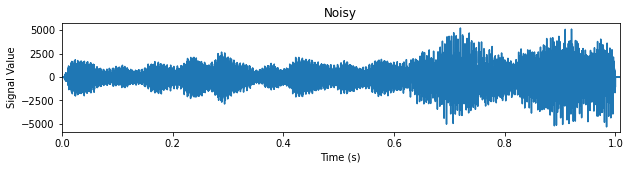

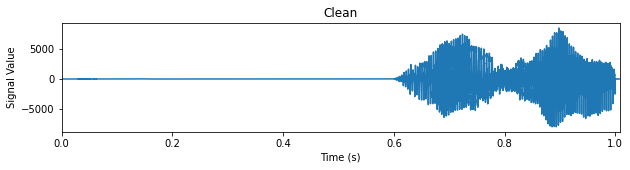

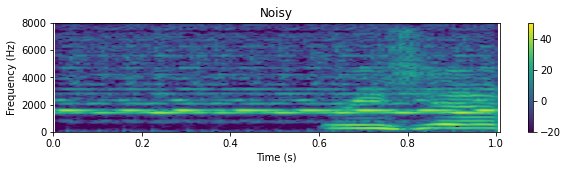

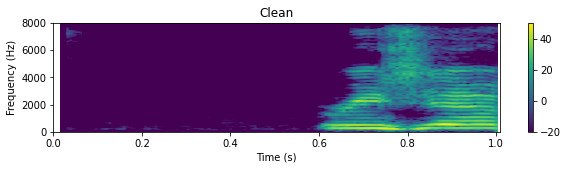

In [42]:
waveforms('/content/noisy_ex.wav','/content/clean_ex.wav')